In [1]:
import os
from pathlib import Path
import sys

if "__project_dir__" not in globals():
    __project_dir__ = Path.cwd().parents[1].resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [2]:
from src.model_analyser import ModelAnalyser
from src.model import tcr_metric, tcr_representation_model

/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
analyser = ModelAnalyser()
model = tcr_representation_model.load_blastr_save(Path("/home/yutanagano/UCLOneDrive/MBPhD/projects/tcr_embedder/model_saves/Beta_CDR_BERT_Unsupervised_Large_Naivelike"))

In [4]:
# model = tcr_metric.BetaTcrdist()

Running AucByLevenshteinGroups...


/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/torch/nn/modules/transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Running MetricCalibrationAnalysis...


100%|██████████| 201/201 [02:09<00:00,  1.55it/s]
/home/yutanagano/Projects/tcr_embedder/src/model_analyser/analysis/metric_calibration_analysis.py:274: RuntimeWarning: divide by zero encountered in divide
  relative_countour = ep_matched_dist_pdf.densities / bg_dist_pdf.densities
/home/yutanagano/Projects/tcr_embedder/src/model_analyser/analysis/metric_calibration_analysis.py:274: RuntimeWarning: invalid value encountered in divide
  relative_countour = ep_matched_dist_pdf.densities / bg_dist_pdf.densities
/home/yutanagano/Projects/tcr_embedder/src/model_analyser/analysis/metric_calibration_analysis.py:274: RuntimeWarning: divide by zero encountered in divide
  relative_countour = ep_matched_dist_pdf.densities / bg_dist_pdf.densities
/home/yutanagano/Projects/tcr_embedder/src/model_analyser/analysis/metric_calibration_analysis.py:274: RuntimeWarning: invalid value encountered in divide
  relative_countour = ep_matched_dist_pdf.densities / bg_dist_pdf.densities


Running KnnAnalysis...
Running PrecisionRecallAnalysis...
Running PgenAnalysis...


100%|██████████| 840/840 [07:31<00:00,  1.86it/s]
/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Running DistanceCorrelateAnalysis...
10 TCRs processed...
Number of estimates at positions:
min: 1080, max: 1360, mean: 1184.0
Number of estimates for each edit:
min: 0, max: 153, mean: 14.095238095238095
20 TCRs processed...
Number of estimates at positions:
min: 2280, max: 2840, mean: 2456.0
Number of estimates for each edit:
min: 1, max: 317, mean: 29.238095238095237
30 TCRs processed...
Number of estimates at positions:
min: 3400, max: 4240, mean: 3680.0
Number of estimates for each edit:
min: 1, max: 475, mean: 43.80952380952381
40 TCRs processed...
Number of estimates at positions:
min: 4480, max: 5600, mean: 4848.0
Number of estimates for each edit:
min: 1, max: 626, mean: 57.714285714285715
50 TCRs processed...
Number of estimates at positions:
min: 5520, max: 6960, mean: 5960.0
Number of estimates for each edit:
min: 2, max: 770, mean: 70.95238095238095
60 TCRs processed...
Number of estimates at positions:
min: 6600, max: 8360, mean: 7176.0
Number of estimates for each edit:


/home/yutanagano/Projects/tcr_embedder/src/model_analyser/tcr_edit_distance_records/tcr_edit_distance_record_collection_analyser.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


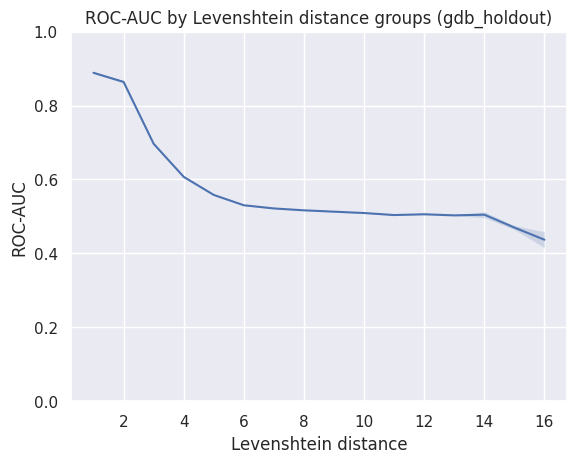

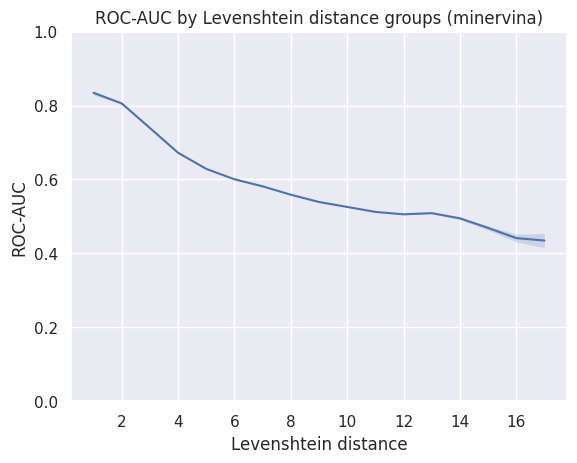

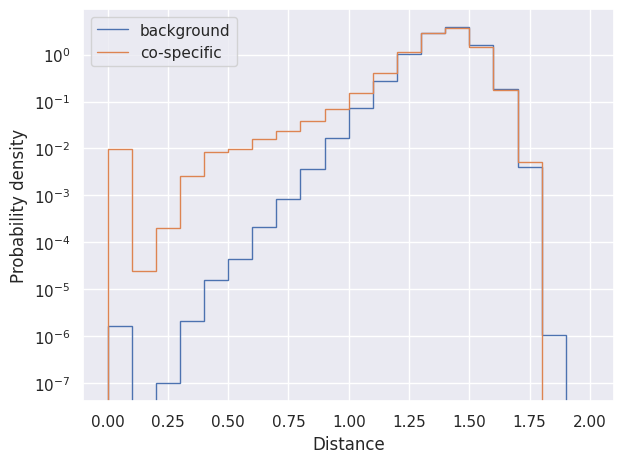

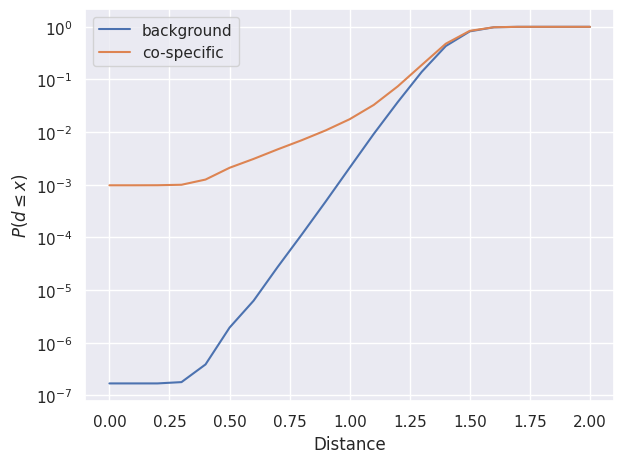

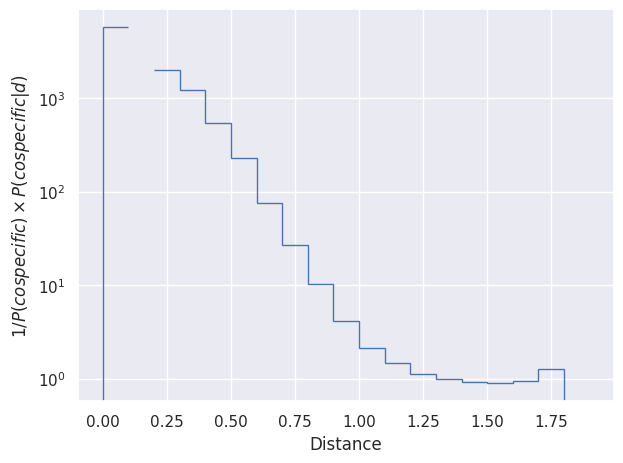

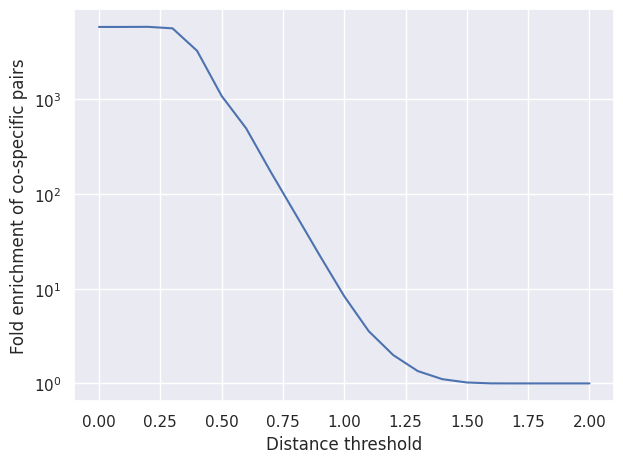

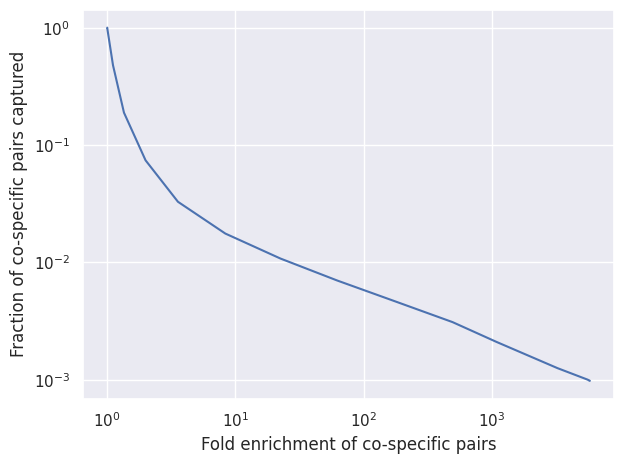

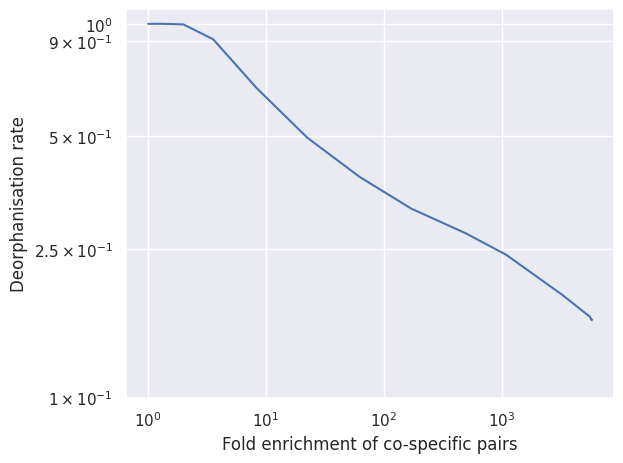

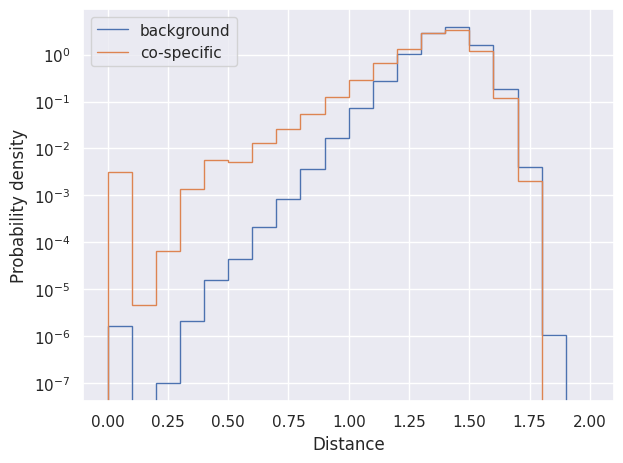

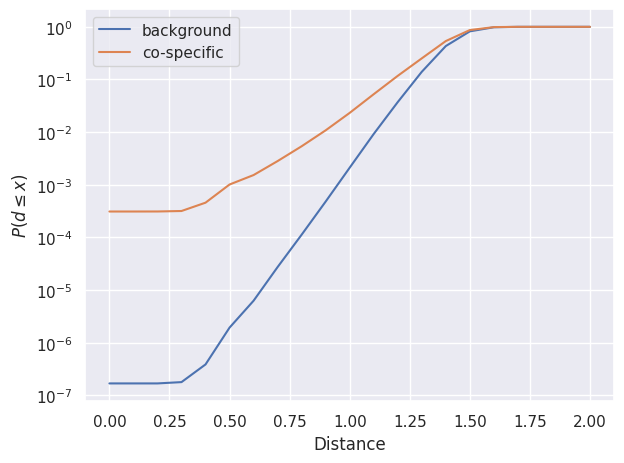

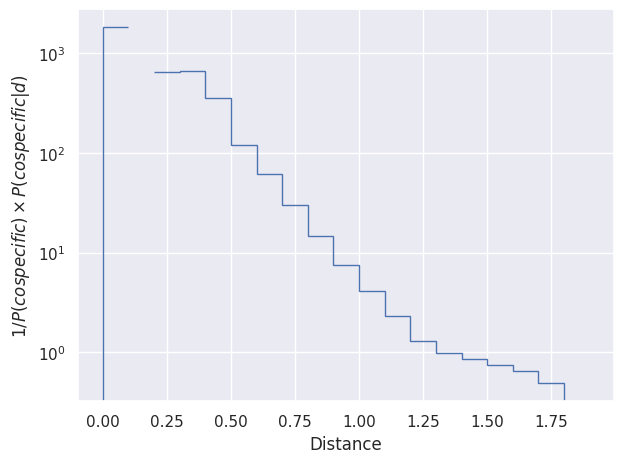

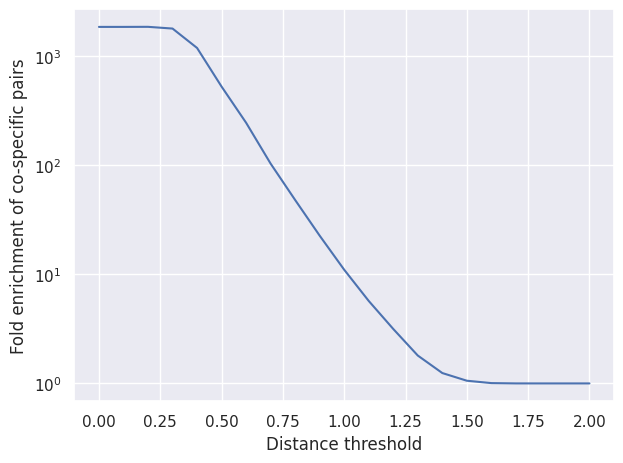

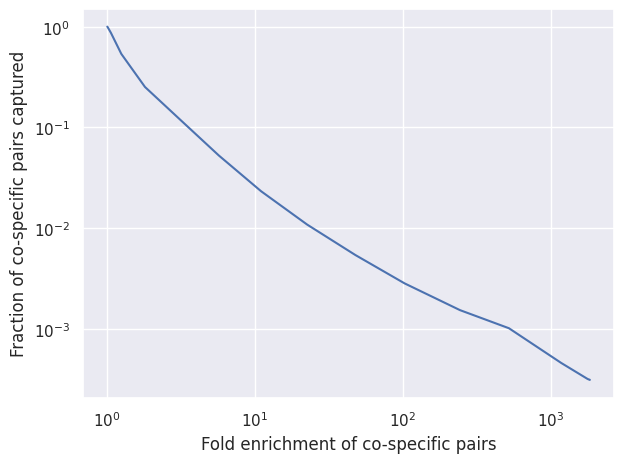

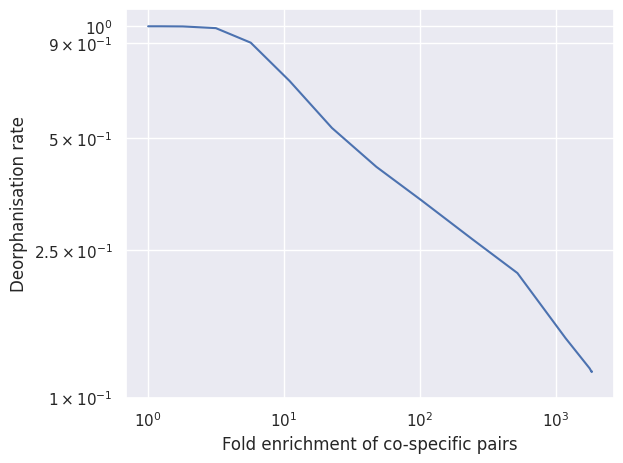

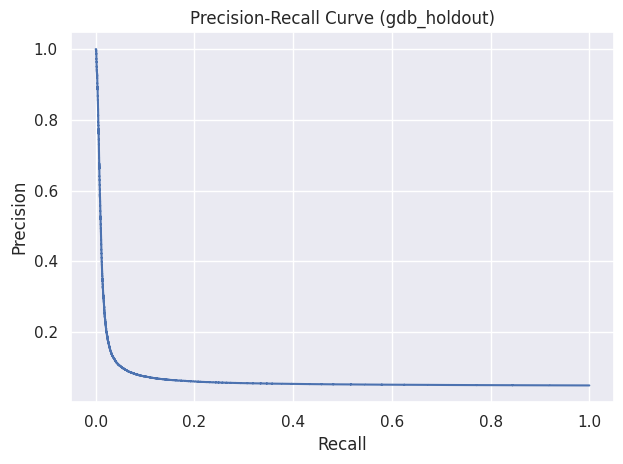

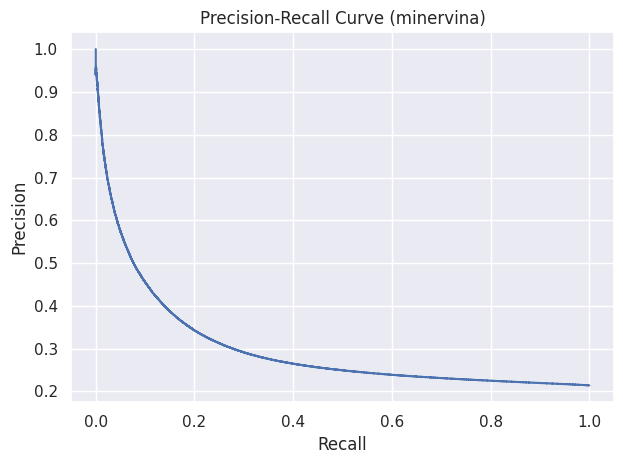

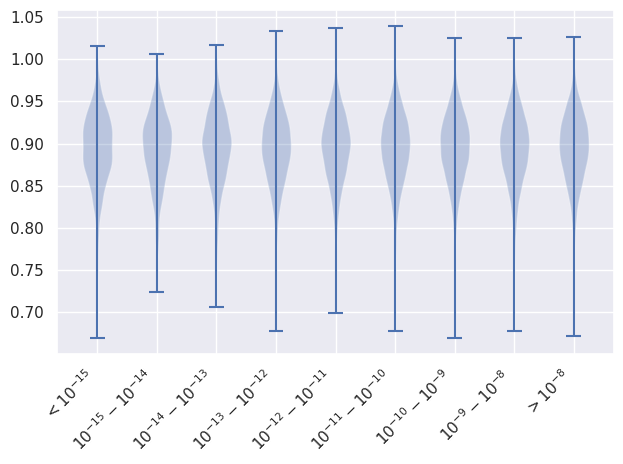

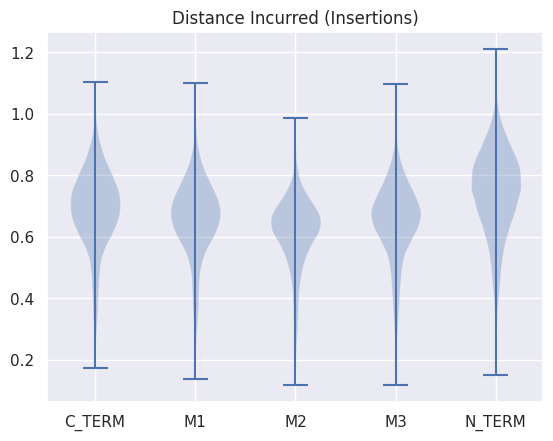

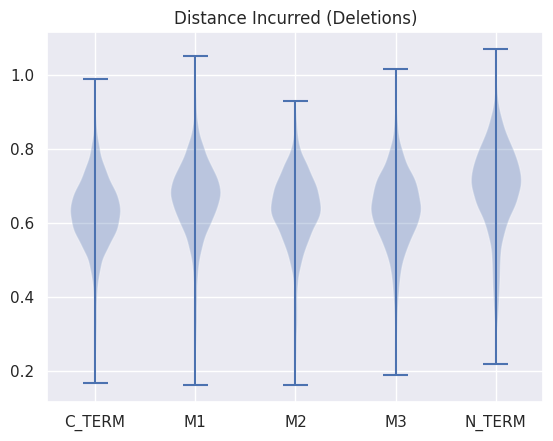

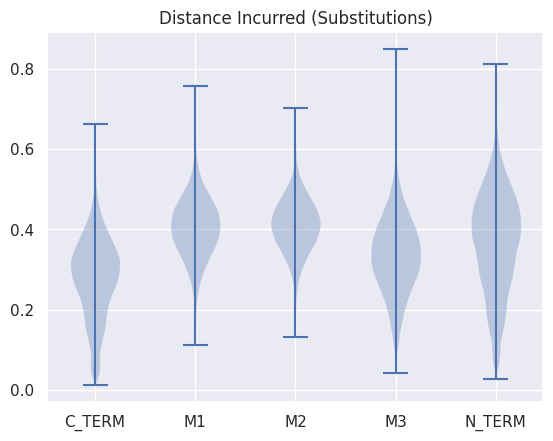

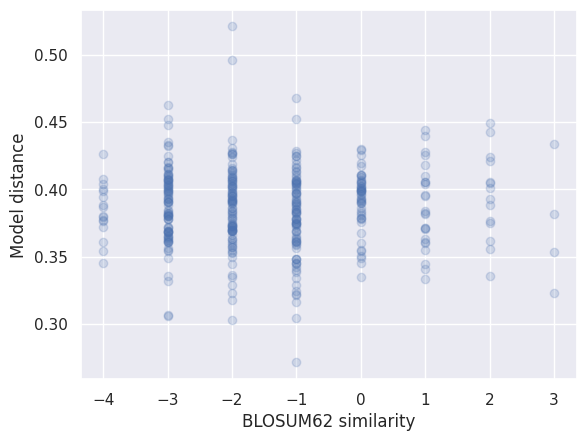

In [5]:
analyser.analyse(model)